# K-최근접 이웃 (K-Nearest Neighbors, K-NN)
- 분류(Classification)와 회귀(Regression) 를 모두 지원한다.
- 예측하려는 데이터와 input 데이터들 간의 거리를 측정해 가장 가까운 K개의 데이터셋의 레이블을 참조해 분류/예측한다.
- 학습시 단순히 input 데이터들을 저장만 하며 예측 시점에 거리를 계산한다.
    - 학습은 빠르지만 예측시 시간이 많이 걸린다.


## 분류

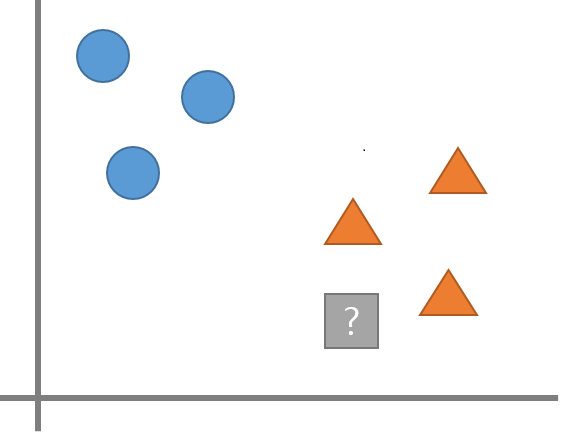

- K-NN에서 **K**는 새로운 데이터포인트를 분류할때 확인할 데이터 포인트의 개수를 지정하는 **하이퍼파라미터** (가장가까운애 몇개나 측정할것인지!)
- K값 : 모델의 복잡도를 규제, 작을수록 복잡도 UP(과적합률상승)

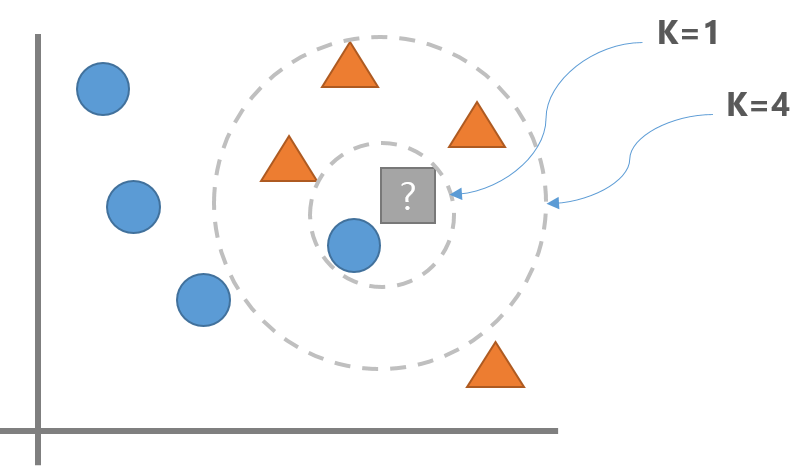

- K를 1로 하면 <font color='blue'>파란색</font>, K를 3으로 하면 <font color='blue'>주황색</font> 으로 분류한다.
- K가 너무 작으면 과적합(Overfitting)이 일어나고 K가 너무 크면 성능이 나빠진다. (Underfitting). 

## 주요 하이퍼 파라미터
- 이웃 수 
    - n_neighbors = K
    - **K가 작을 수록 모델이 복잡해져 과적합이 일어나고 너무 크면 단순해져 성능이 나빠진다.**
    - n_neighbors는 Feature수의 제곱근 정도를 지정할 때 성능이 좋은 것으로 알려져 있다.
- 거리 재는 방법 
    - p=2: 유클리디안 거리(Euclidean distance - 기본값)
    - p=1: 맨하탄 거리(Manhattan distance)
    

> ### 유클리디안 거리(Euclidean_distance, L2 norm)
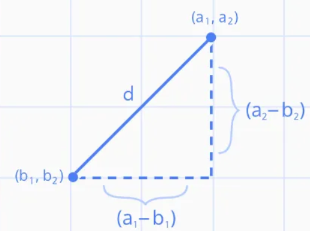

$$
distance = \sqrt{(a_1 - b_1)^2 + (a_2-b_2)^2}\\
n차원 벡터간의 거리 = \sqrt{(a_1 - b_1)^2 + (a_2-b_2)^2 +...+(a_n-b_n)^2}
$$

> ### 맨하탄 거리 (Manhattan distance, L1 norm)
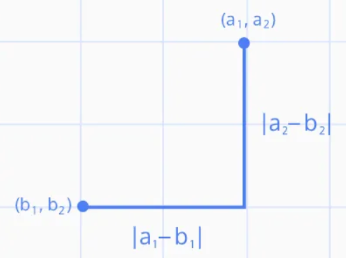

$$
distance = |a_1 - b_1| + |a_2 - b_2| \\
𝑛차원벡터간의거리= |a_1 - b_1| + |a_2 - b_2| + ... + |a_n - b_n|
$$

## 요약
- K-NN은 이해하기 쉬운 모델이며 튜닝할 하이퍼파라미터의 수가 적어 빠르게 만들 수있다.
- K-NN은 서비스할 모델을 구현할때 보다는 **복잡한 알고리즘을 적용해 보기 전에 확인용 또는 base line을 잡기 위한 모델로 사용한다.**
- 훈련세트가 너무 큰 경우(Feature나 관측치의 개수가 많은 경우) 거리를 계산하는 양이 늘어나 예측이 느려진다.
- Feature간의 값의 단위가 다르면 작은 단위의 Feature에 영향을 많이 받게 되므로 **전처리로 Scaling작업**이 필요하다.
- Feature가 너무 많은 경우와 대부분의 값이 0으로 구성된(희소-sparse) 데이터셋에서 성능이 아주 나쁘다(원핫인코딩보다는 라벨인코딩이 더 적합 -> scaling)

## 위스콘신 유방암 데이터를 이용한 암환자분류
### K값 변화에 따른 성능 평가
- malignant: 악성
- benign : 양성

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
y_train.shape, y_test.shape

((426,), (143,))

In [3]:
# KNN - Feature Scaling 전처리를 해준다
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# KNN 모델을 잉ㅇ해 train, 평가

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

k_param = range(1,11)  # 1~10
train_acc_list = []
test_acc_list = []

for k in k_param:
    #모델생성
    knn = KNeighborsClassifier(n_neighbors=k)
    # 학습
    knn.fit(X_train, y_train)
    # 평가
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)

    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

# knn = KNeighborClassifier()


In [14]:
pd.DataFrame({
    'K':k_param,
    'Train':train_acc_list,
    'Test':test_acc_list
})

,K,Train,Test
0,1,1.000000,0.916084
1,2,0.962441,0.881119
2,3,0.957746,0.916084
3,4,0.957746,0.909091
4,5,0.946009,0.916084
5,6,0.950704,0.916084
6,7,0.946009,0.923077
7,8,0.948357,0.923077
8,9,0.943662,0.916084
9,10,0.946009,0.916084


K값 변화에 따른 정확도 변화


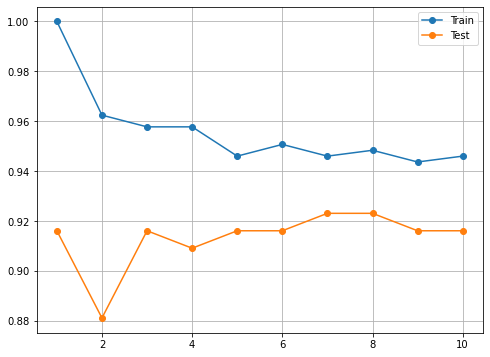

In [17]:
import matplotlib.pyplot as plt

print('K값 변화에 따른 정확도 변화')
plt.figure(figsize=(8,6))
plt.plot(k_param, train_acc_list, marker='o', label='Train')
plt.plot(k_param, test_acc_list, marker='o', label='Test')

# plt.title('K값 변화에 따른 정확도 변화')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# K를 8로 해서 모델 생성
best_model = KNeighborsClassifier(n_neighbors=8)
best_model.fit(X_train_scaled, y_train)

accuracy_score(y_test, best_model.predict(X_test_scaled))

0.958041958041958

In [23]:
X_train_scaled.shape, y_train.shape

((426, 30), (426,))

In [19]:
X_test_scaled[0]

array([0.29330525, 0.22387555, 0.28339735, 0.1738179 , 0.44664515,
       0.16308815, 0.04667022, 0.09827496, 0.28838384, 0.24410278,
       0.03374977, 0.03391029, 0.02902511, 0.01951445, 0.0407898 ,
       0.03737195, 0.02329822, 0.12413203, 0.01442135, 0.03813608,
       0.26211534, 0.21801706, 0.2394896 , 0.13641326, 0.31941988,
       0.13510702, 0.09632588, 0.29982776, 0.2444795 , 0.19167728])

In [25]:
X_train_scaled.shape

(426, 30)

## GridSearch/Pipeline을 이용해 구현

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [27]:
# pipeline (scaler, knn)
order = [
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
]

pipeline = Pipeline(order, verbose=True)

# GridSearchCV
param={
    'knn__n_neighbors':range(1,11),
    'knn__p':[1,2]  # 1:맨하탄거리, 2:유클리드거리
}
gs = GridSearchCV(pipeline, param, scoring='accuracy', cv=5, n_jobs=-1)

gs.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 11), 'knn__p': [1, 2]},
             scoring='accuracy')

In [28]:
gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3, p=1))],
         verbose=True)

In [41]:
gs.best_score_

0.9836388508891929

In [33]:
result_df = pd.DataFrame(gs.cv_results_)
result_df[result_df.columns[6:]].sort_values('rank_test_score').head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,"{'knn__n_neighbors': 3, 'knn__p': 1}",0.953488,0.988235,0.988235,0.988235,1.000000,0.983639,0.015749,1
13,"{'knn__n_neighbors': 7, 'knn__p': 2}",0.941860,0.988235,0.976471,1.000000,0.988235,0.978960,0.019987,2
6,"{'knn__n_neighbors': 4, 'knn__p': 1}",0.953488,0.988235,0.988235,1.000000,0.964706,0.978933,0.017127,3
12,"{'knn__n_neighbors': 7, 'knn__p': 1}",0.930233,0.988235,0.988235,0.988235,0.988235,0.976635,0.023201,4
15,"{'knn__n_neighbors': 8, 'knn__p': 2}",0.953488,0.976471,0.976471,1.000000,0.976471,0.976580,0.014709,5


In [34]:
best_model = gs.best_estimator_
accuracy_score(y_test, best_model.predict(X_test))

0.951048951048951

## iris dataset 분류
- model: KNN 사용
- gridsearch를 이용해서 최적의 K값 찾는다.

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV

In [37]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# 파이프라인 생성
order = [
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
]

pipeline = Pipeline(order, verbose=True)

# GridSearchCV의 param값 지정
param1 = {
    'knn__n_neighbors':range(1,11)
}

param2 = {
    'knn__n_neighbors':range(1,11),
    'knn__p':[1,2]
}

# 하이퍼파라미터를 돌려가며 최적의 모델을 찾는다
gs1 = GridSearchCV(pipeline, param1, scoring='accuracy', n_jobs=-1, cv=4)
gs2 = GridSearchCV(pipeline, param2, scoring='accuracy', n_jobs=-1, cv=4)
gs1.fit(X_train, y_train)
gs2.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 11), 'knn__p': [1, 2]},
             scoring='accuracy')

In [58]:
gs1.best_score_, gs2.best_score_

(0.9732142857142858, 0.9732142857142858)

In [59]:
gs1.best_estimator_, gs2.best_estimator_

(Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('knn', KNeighborsClassifier(n_neighbors=6))],
          verbose=True),
 Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('knn', KNeighborsClassifier(n_neighbors=6))],
          verbose=True))

In [51]:
result_df1 = pd.DataFrame(gs1.cv_results_)
result_df1[result_df1.columns[5:]].sort_values('rank_test_score').head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
9,{'knn__n_neighbors': 10},0.964286,0.964286,1.000000,0.964286,0.973214,0.015465,1
5,{'knn__n_neighbors': 6},0.964286,0.964286,1.000000,0.964286,0.973214,0.015465,1
3,{'knn__n_neighbors': 4},0.928571,0.964286,1.000000,0.964286,0.964286,0.025254,3
11,{'knn__n_neighbors': 12},0.964286,0.964286,0.964286,0.964286,0.964286,0.000000,3
13,{'knn__n_neighbors': 14},0.964286,0.928571,1.000000,0.964286,0.964286,0.025254,3


In [53]:
result_df2 = pd.DataFrame(gs2.cv_results_)
result_df2[result_df2.columns[6:]].sort_values('rank_test_score').head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
19,"{'knn__n_neighbors': 10, 'knn__p': 2}",0.964286,0.964286,1.000000,0.964286,0.973214,0.015465,1
11,"{'knn__n_neighbors': 6, 'knn__p': 2}",0.964286,0.964286,1.000000,0.964286,0.973214,0.015465,1
27,"{'knn__n_neighbors': 14, 'knn__p': 2}",0.964286,0.928571,1.000000,0.964286,0.964286,0.025254,3
23,"{'knn__n_neighbors': 12, 'knn__p': 2}",0.964286,0.964286,0.964286,0.964286,0.964286,0.000000,3
7,"{'knn__n_neighbors': 4, 'knn__p': 2}",0.928571,0.964286,1.000000,0.964286,0.964286,0.025254,3


In [60]:
accuracy_score(y_test, gs1.best_estimator_.predict(X_test))

0.9736842105263158